1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg as la

In [46]:
# generating dataset with 3 features of 1000 entries
N = 10000
mu1, sigma1 = 0, 1
mu2, sigma2 = 0, 3
x1 = np.random.normal(mu1, sigma1, N)
x2 = x1 + np.random.normal(mu2, sigma2, N)
x3 = 2*x1 + x2

X = np.array((x1,x2,x3))

In [47]:
# covariance matrix of the dataset
cov = np.cov(X)
print("covariance matrix \n", cov, "\n")

# eigenvalues and eigenvectors of covariance matrix
l, V = la.eig(cov)
print("eigenvalues \n", np.real_if_close(l), "\n")
print("eigenvectors \n", V)

covariance matrix 
 [[ 0.99637512  0.98438567  2.97713591]
 [ 0.98438567 10.00512257 11.97389392]
 [ 2.97713591 11.97389392 17.92816573]] 

eigenvalues 
 [ 2.69240579e+01 -1.01422100e-15  2.00560555e+00] 

eigenvectors 
 [[-0.11470184 -0.81649658  0.56584169]
 [-0.57830987 -0.40824829 -0.70632219]
 [-0.80771355  0.40824829  0.4253612 ]]


In [48]:
# eigenvalues and eigenvectors using SVD
U_svd, D_svd, V_svd = la.svd(cov)

print(D_svd)

# check if are the same of prevoius ones
print("eigenvalues with SVD are the same \n", 
      "eig (l):  ", l, "\n", "svd (D):  ", D_svd, "\n")
print("value 1-1 -> ", np.allclose(l[0], D_svd[0]), "\n",
    "value 2-3 -> ", np.allclose(l[1], D_svd[2]), "\n",
    "value 3-2 -> ", np.allclose(l[2], D_svd[1]), "\n")

print("eigenvectors with SVD are the same \n", 
      "eig (V):\n", V, "\n", "svd (V.T):\n", V_svd.T, "\n", "svd (U):\n", U_svd, "\n")
print("column 1-1-1 -> ", np.allclose(V[:,0], V_svd.T[:,0]), np.allclose(V[:,0], U_svd[:,0]), "\n",
    "column 2-3-3 -> ", np.allclose(V[:,1], V_svd.T[:,2]), np.allclose(V[:,1], U_svd[:,2]), "\n",
    "column 3-2-2 -> ", np.allclose(V[:,2], V_svd.T[:,1]), np.allclose(V[:,2], U_svd[:,1]))

[2.69240579e+01 2.00560555e+00 1.24928310e-15]
eigenvalues with SVD are the same 
 eig (l):   [ 2.69240579e+01+0.j -1.01422100e-15+0.j  2.00560555e+00+0.j] 
 svd (D):   [2.69240579e+01 2.00560555e+00 1.24928310e-15] 

value 1-1 ->  True 
 value 2-3 ->  True 
 value 3-2 ->  True 

eigenvectors with SVD are the same 
 eig (V):
 [[-0.11470184 -0.81649658  0.56584169]
 [-0.57830987 -0.40824829 -0.70632219]
 [-0.80771355  0.40824829  0.4253612 ]] 
 svd (V.T):
 [[-0.11470184  0.56584169  0.81649658]
 [-0.57830987 -0.70632219  0.40824829]
 [-0.80771355  0.4253612  -0.40824829]] 
 svd (U):
 [[-0.11470184  0.56584169 -0.81649658]
 [-0.57830987 -0.70632219 -0.40824829]
 [-0.80771355  0.4253612   0.40824829]] 

column 1-1-1 ->  True True 
 column 2-3-3 ->  False True 
 column 3-2-2 ->  True True


In [49]:
#dimensionality reduction to retain 99% of variability
diagonal = np.diag(l) #3x3 diagonal matrix of eigenvalues
print("trace of covariance matrix:", cov.trace())
print("trace of diagonal matrix of eigenvalues:", diagonal.trace())
print("percentage of variability with (1,1) element: ", diagonal[0,0]/diagonal.trace())
print("percentage of variability with (1,1),(2,2) elements: ", (diagonal[0,0]+diagonal[1,1])/diagonal.trace())
print("percentage of variability with (1,1),(3,3) elements: ", (diagonal[0,0]+diagonal[2,2])/diagonal.trace())

trace of covariance matrix: 28.92966341586699
trace of diagonal matrix of eigenvalues: (28.929663415866983+0j)
percentage of variability with (1,1) element:  (0.9306730422178794+0j)
percentage of variability with (1,1),(2,2) elements:  (0.9306730422178794+0j)
percentage of variability with (1,1),(3,3) elements:  (1+0j)


In [50]:
#ridefining data in new base by PCA
X_new = np.dot(V.T,X)
l0, V0 = la.eig(np.cov(X)/(N-1))
X_new = np.dot(V0.T, X)

#cov_new = np.cov(X_new)
cov_new = np.cov(X)/(len(X[0])-1)
l_new, V_new = la.eig(cov_new)
print ("new eigenvalues \n", np.real_if_close(l_new), "\n")
print ("new eigenvectors \n", V_new)

new eigenvalues 
 [ 2.69267505e-03 -1.29383147e-19  2.00580613e-04] 

new eigenvectors 
 [[-0.11470184 -0.81649658  0.56584169]
 [-0.57830987 -0.40824829 -0.70632219]
 [-0.80771355  0.40824829  0.4253612 ]]


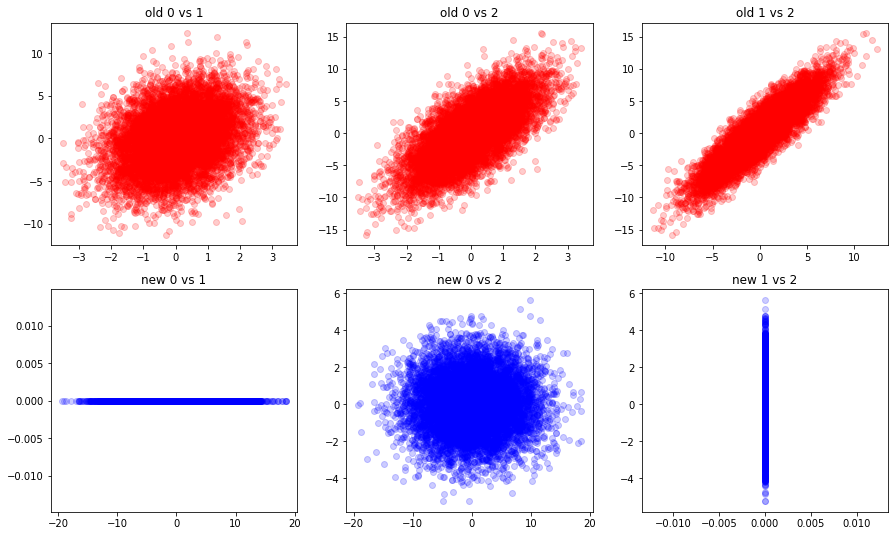

In [51]:
#6 scatter plots: 3 of original and 3 of new data points
#columns show the (0,1), (0,2) and (1,2) proejctions
nrows = 2
ncols = 3

fig = plt.figure(figsize=(15,9))
fig.add_subplot(nrows,ncols,1)
plt.scatter(X[0],X[1], color="r", alpha=0.2)
plt.title("old 0 vs 1")

fig.add_subplot(nrows,ncols,2)
plt.scatter(X[0],X[2], color="r", alpha=0.2)
plt.title("old 0 vs 2")

fig.add_subplot(nrows,ncols,3)
plt.scatter(X[1],X[2], color="r", alpha=0.2)
plt.title("old 1 vs 2")

fig.add_subplot(nrows,ncols,4)
plt.scatter(X_new[0],X_new[1], color="b", alpha=0.2)
plt.title("new 0 vs 1")

fig.add_subplot(nrows,ncols,5)
plt.scatter(X_new[0],X_new[2], color="b", alpha=0.2)
plt.title("new 0 vs 2")

fig.add_subplot(nrows,ncols,6)
plt.scatter(X_new[1],X_new[2], color="b", alpha=0.2)
plt.title("new 1 vs 2")
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

/home/matteo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


1st eigenvalue  0.9541147814191976
2nd eigenvalue:  -6.063753743014664e-17
3rd eigenvalue:  0.07279757187028887


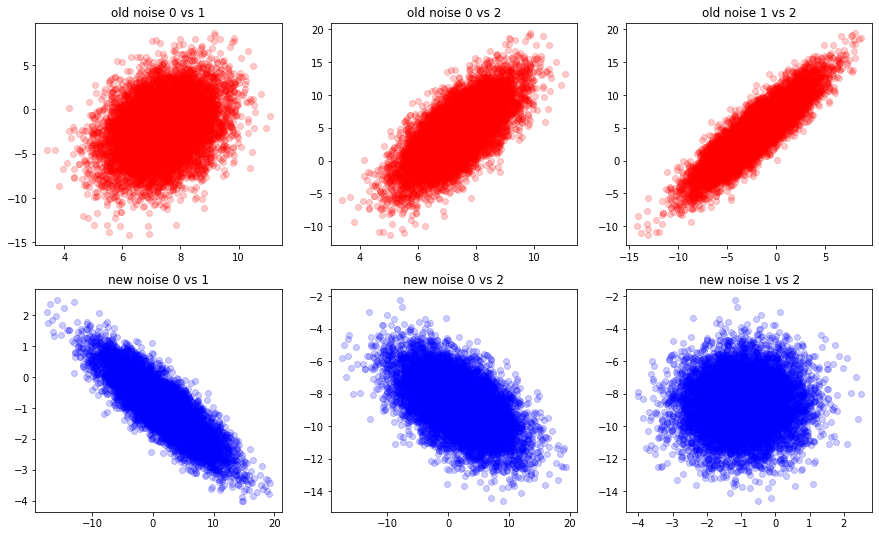

In [43]:
#generating 10 noises distributions
n = 10
noises1 = [np.random.normal(loc=0, scale = 1/50, size=N) for i in range(n)] #array of 10 arrays of 10000 elements
x1_n = x1 + np.sum(noises1)
noises2 = [np.random.normal(loc=0, scale = 1/50, size=N) for i in range(n)] #array of 10 arrays of 10000 elements
x2_n = x2 + np.sum(noises2)
noises3 = [np.random.normal(loc=0, scale = 1/50, size=N) for i in range(n)] #array of 10 arrays of 10000 elements
x3_n = x3 + np.sum(noises3)
X_n = np.array((x1_n,x2_n,x3_n))

#eigenvaules and eigenvectors of noised data
cov_n = np.cov(X_n)
l_n, V_n = la.eig(cov_n)
U_n, D_n, V_n = la.svd(cov_n)

#PCA procedure with noised data
X_n_new = np.dot(V_n.T,X_n)
sum = int(l_n[0]+l_n[1]+l_n[2])
print("1st eigenvalue ", np.real_if_close(l_n[0]/sum))
print("2nd eigenvalue: ", np.real_if_close(l_n[1]/sum))
print("3rd eigenvalue: ", np.real_if_close(l_n[2]/sum))

#6 plots
nrows = 2
ncols = 3
fig = plt.figure(figsize=(15,9))
fig.add_subplot(nrows,ncols,1)
plt.scatter(X_n[0],X_n[1], color="r", alpha=0.2)
plt.title("old noise 0 vs 1")
fig.add_subplot(nrows,ncols,2)
plt.scatter(X_n[0],X_n[2], color="r", alpha=0.2)
plt.title("old noise 0 vs 2")
fig.add_subplot(nrows,ncols,3)
plt.scatter(X_n[1],X_n[2], color="r", alpha=0.2)
plt.title("old noise 1 vs 2")
fig.add_subplot(nrows,ncols,4)
plt.scatter(X_n_new[0],X_n_new[1], color="b", alpha=0.2)
plt.title("new noise 0 vs 1")
fig.add_subplot(nrows,ncols,5)
plt.scatter(X_n_new[0],X_n_new[2], color="b", alpha=0.2)
plt.title("new noise 0 vs 2")
fig.add_subplot(nrows,ncols,6)
plt.scatter(X_n_new[1],X_n_new[2], color="b", alpha=0.2)
plt.title("new noise 1 vs 2")
plt.show()

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 